<h2 align="center"><b>Кмоп'ютерний практикум №7</b></h2>
<h3 align="center">Дослідження особливостей алгоритму швидкого сортування</h3>
<h5 align="right">Роботу виконав студент групи ФІ-21, Беркута Володимир</h5>

### **Мета роботи**

Реалізація та порівняльний аналіз модифікацій алгоритму швидкого сортування.

### **Завдання на комп'ютерний практикум**

1) Реалiзувати алгоритм швидкого сортування зi схемами розбиття Ломуто та Гоара, а також вибором опорного елемента як останнього елемента, випадкового елемента, медiани першого, останнього та середнього  eлементiв i медiани трьох випадкових елементiв (з пiдтримкою обчислення часу виконання, кiлькостi проведених порiвнянь, операцiй переставляння елементiв та використаної пам’ятi). (Загальна кiлькiсть модифiкацiй дорiвнює 8 — 2 схеми розбиття $times$ 4 методи вибору опорного елемента.)

2) Пiдготувати данi рiзного розмiру для проведення порiвняльного аналiзу. Мають бути набори однакових елементiв, повнiстю вiдсортованих даних, випадкових даних, майже вiдсортованих, вiдсортованих в  зворотному порядку, “трикутнi” (перша половина є строго висхiдною послiдовнiстю, а друга половина є дзеркальним вiдображенням першої) та лише з декiлькома рiзними значеннями всiх розмiрiв. Розмiр даних має бути з достатнього дiапазону, щоб побачити тенденцiю, й повинен мiстити такi, на яких можна побачити рiзницю. Можна взяти обмеження за часом виконання вiд 0.01с до 30с.

3) Реалiзувати додатково варiант алгоритму швидкого сортування, який використовує 3-стороннє розбиття з вибором опорного елемента як медiани трьох випадково обраних елементiв.

4) Реалiзувати додатково варiант алгоритму швидкого сортування з двома опорними елементами (метод вибору елементiв та схему розбиття можна взяти з оригiнальної статтi, або на власний розсуд).

5) Виконати порiвняльний аналiз (з даними рiзного розмiру) всiх варiантiв алгоритму швидкого сортування вiдносно часу виконання, кiлькостi проведених порiвнянь, операцiй переставлення елементiв та використаної пам’ятi.

In [2]:
import matplotlib.pyplot as plt
import random
import time
import copy

print("Import complete")

Import complete


### Пункт $(a)$
Схеми розбиття Ломуто та Гоара

In [3]:
class Metrics:
    def __init__(self):
        self.memory_usage = 0
        self.comparisons = 0
        self.swap = 0
    
    def reset(self):
        self.memory_usage = 0
        self.comparisons = 0
        self.swap = 0

metrics = Metrics()

In [4]:
def lomuto_partition_last(A, p, r):
    return LomutoPartion(A, p, r)

def lomuto_partition_first(A, p, r):
    # swap
    metrics.swap += 1
    A[r], A[p] = A[p], A[r]
    return LomutoPartion(A, p, r)

def lomuto_partition_random(A, p, r):
    i = random.randint(p, r)
    metrics.memory_usage += i.__sizeof__()
    # swap
    metrics.swap += 1
    A[r], A[i] = A[i], A[r]
    return LomutoPartion(A, p, r)

def lomuto_partition_median(A, p, r):
    i = (p + r) // 2
    metrics.memory_usage += i.__sizeof__()
    metrics.comparisons += 1
    if A[r] < A[p]:
        metrics.swap += 1
        A[r], A[p] = A[p], A[r]
    
    metrics.comparisons += 1
    if A[r] < A[i]:
        metrics.swap += 1
        A[r], A[i] = A[i], A[r]
    return LomutoPartion(A, p, r)

def lomuto_partition_random_median(A, p, r):
    if r-p >= 3:
        indexes = random.sample(list(range(p, r+1)), k=3)
        metrics.memory_usage += indexes.__sizeof__()
        tmp = [A[indexes[0]], A[indexes[1]], A[indexes[2]]]
        metrics.memory_usage += tmp.__sizeof__()
        tmp.sort()
        # comparisons
        metrics.comparisons += 2
        for ind in indexes:
            if A[ind] == tmp[1]:
                index = ind
    else:
        index = random.randint(p, r)
    metrics.memory_usage += index.__sizeof__()
    # swap
    metrics.swap += 1
    A[index], A[r] = A[r], A[index]
    return LomutoPartion(A, p, r)
     

def LomutoPartion(A, p, r):
    x = A[r]
    metrics.memory_usage += x.__sizeof__()
    i = p - 1
    metrics.memory_usage += i.__sizeof__()
    for j in range(p, r):
        metrics.comparisons += 1
        if A[j] <= x:
            i += 1
            # swap
            metrics.swap += 1
            A[i], A[j] = A[j], A[i]
    i += 1
    # swap
    metrics.swap += 1
    A[i], A[r] = A[r], A[i]
    return i

def quick_sort_lomuto(A, pivot, p = None, r = None):
    stack = [(0, len(A) - 1)]

    while stack:
        p, r = stack.pop()
        if p < r:
            q = pivot(A, p, r)
            stack.append((p, q - 1))
            stack.append((q + 1, r))


In [5]:
test_data = [random.randint(1, 100) for _ in range(11)]
print(f"Before sorting: {test_data}")

print("\nLast pivot")
metrics.reset()
test_data_last = copy.deepcopy(test_data)
start_time = time.time()
end_time = time.time() - start_time
quick_sort_lomuto(test_data_last, lomuto_partition_first)
print(f"After sorting: \t{test_data_last}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

print("\nFirst pivot")
metrics.reset()
test_data_first = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_lomuto(test_data_first, lomuto_partition_first)
end_time = time.time() - start_time
print(f"After sorting: \t{test_data_first}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

print("\nRandom pivot")
metrics.reset()
test_data_random = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_lomuto(test_data_random, lomuto_partition_random)
end_time = time.time() - start_time
print(f"After sorting: \t{test_data_random}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

print("\nMedian pivot")
metrics.reset()
test_data_median = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_lomuto(test_data_median, lomuto_partition_median)
end_time = time.time() - start_time
print(f"After sorting: \t{test_data_median}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

print("\nRandom median pivot")
metrics.reset()
test_data_median = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_lomuto(test_data_median, lomuto_partition_random_median)
end_time = time.time() - start_time
print(f"After sorting: \t{test_data_median}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

Before sorting: [48, 29, 84, 81, 87, 27, 92, 71, 27, 59, 98]

Last pivot
After sorting: 	[27, 27, 29, 48, 59, 71, 81, 84, 87, 92, 98]
Swap: 27
Comparisons: 24
Memory usage: 392
Time: 0.0

First pivot
After sorting: 	[27, 27, 29, 48, 59, 71, 81, 84, 87, 92, 98]
Swap: 27
Comparisons: 24
Memory usage: 392
Time: 0.0

Random pivot
After sorting: 	[27, 27, 29, 48, 59, 71, 81, 84, 87, 92, 98]
Swap: 30
Comparisons: 30
Memory usage: 588
Time: 0.0

Median pivot
After sorting: 	[27, 27, 29, 48, 59, 71, 81, 84, 87, 92, 98]
Swap: 47
Comparisons: 52
Memory usage: 588
Time: 0.0

Random median pivot
After sorting: 	[27, 27, 29, 48, 59, 71, 81, 84, 87, 92, 98]
Swap: 25
Comparisons: 33
Memory usage: 972
Time: 0.0


In [6]:
def hoare_partition_last(A, p, r):
    return HoarePartion(A, p, r)

def hoare_partition_first(A, p, r):
    # swap
    metrics.swap += 1
    A[r], A[p] = A[p], A[r]
    return HoarePartion(A, p, r)

def hoare_partition_random(A, p, r):
    i = random.randint(p, r)
    metrics.memory_usage += i.__sizeof__()
    # swap
    metrics.swap += 1
    A[r], A[i] = A[i], A[r]
    return HoarePartion(A, p, r)

def hoare_partition_median(A, p, r):
    i = (p + r) // 2
    metrics.memory_usage += i.__sizeof__()
    a = [A[p], A[i], A[r]]
    metrics.memory_usage += a.__sizeof__()
    metrics.comparisons += 2
    a.sort()
    for ind in [p, i, r]:
        if A[ind] == a[1]:
            index = ind
    # swap
    metrics.swap += 1
    A[index], A[r] = A[r], A[index]
    return HoarePartion(A, p, r)

def hoare_partition_random_median(A, p, r):
    if r-p >= 3:
        indexes = random.sample(list(range(p, r+1)), k=3)
        metrics.memory_usage += indexes.__sizeof__()
        tmp = [A[indexes[0]], A[indexes[1]], A[indexes[2]]]
        metrics.memory_usage += tmp.__sizeof__()
        tmp.sort()
        # comparisons
        metrics.comparisons += 2
        for ind in indexes:
            if A[ind] == tmp[1]:
                index = ind
    else:
        index = random.randint(p, r)
    metrics.memory_usage += index.__sizeof__()
    # swap
    metrics.swap += 1
    A[index], A[r] = A[r], A[index]
    return HoarePartion(A, p, r)

def HoarePartion(A, p, r):
    x = A[r]
    metrics.memory_usage += x.__sizeof__()
    
    i = p
    metrics.memory_usage += i.__sizeof__()
    j = r - 1
    metrics.memory_usage += j.__sizeof__()
    while i < j:
        while A[i] < x:
            metrics.comparisons += 1
            i += 1
        while A[j] > x:
            metrics.comparisons += 1
            j -= 1
        if i < j:
            # swap
            metrics.swap += 1
            A[i], A[j] = A[j], A[i]
            i += 1
            j -= 1
    
    metrics.comparisons += 1
    if A[i] >= x:
        # swap
        metrics.swap += 1
        A[i], A[r] = A[r], A[i]
    return i

def quick_sort_hoare(A, pivot, p = None, r = None):
    stack = [(0, len(A) - 1)]

    while stack:
        p, r = stack.pop()
        if p < r:
            q = pivot(A, p, r)
            stack.append((p, q - 1))
            stack.append((q + 1, r))

In [7]:
test_data = [random.randint(1, 100) for _ in range(11)]
print(f"Before sorting: {test_data}")

print("\nLast pivot")
metrics.reset()
test_data_last = copy.deepcopy(test_data)
start_time = time.time()
end_time = time.time() - start_time
quick_sort_hoare(test_data_last, hoare_partition_last)
print(f"After sorting: \t{test_data_last}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

print("\nFirst pivot")
metrics.reset()
test_data_first = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_hoare(test_data_first, hoare_partition_first)
end_time = time.time() - start_time
print(f"After sorting: \t{test_data_first}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

print("\nRandom pivot")
metrics.reset()
test_data_random = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_hoare(test_data_random, hoare_partition_random)
end_time = time.time() - start_time
print(f"After sorting: \t{test_data_random}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

print("\nMedian pivot")
metrics.reset()
test_data_median = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_hoare(test_data_median, hoare_partition_median)
end_time = time.time() - start_time
print(f"After sorting: \t{test_data_median}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

print("\nRandom median pivot")
metrics.reset()
test_data_median = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_hoare(test_data_median, hoare_partition_random_median)
end_time = time.time() - start_time
print(f"After sorting: \t{test_data_median}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

Before sorting: [8, 37, 24, 18, 42, 70, 79, 40, 75, 33, 53]

Last pivot
After sorting: 	[8, 18, 24, 33, 37, 40, 42, 53, 70, 75, 79]
Swap: 9
Comparisons: 20
Memory usage: 588
Time: 0.0

First pivot
After sorting: 	[8, 18, 24, 33, 37, 40, 42, 53, 70, 75, 79]
Swap: 15
Comparisons: 31
Memory usage: 588
Time: 0.0

Random pivot
After sorting: 	[8, 18, 24, 33, 37, 40, 42, 53, 70, 75, 79]
Swap: 17
Comparisons: 22
Memory usage: 784
Time: 0.0

Median pivot
After sorting: 	[8, 18, 24, 33, 37, 40, 42, 53, 70, 75, 79]
Swap: 16
Comparisons: 31
Memory usage: 1056
Time: 0.0

Random median pivot
After sorting: 	[8, 18, 24, 33, 37, 40, 42, 53, 70, 75, 79]
Swap: 15
Comparisons: 24
Memory usage: 1184
Time: 0.0


### Пункт $(б)$
Генерація набору даних

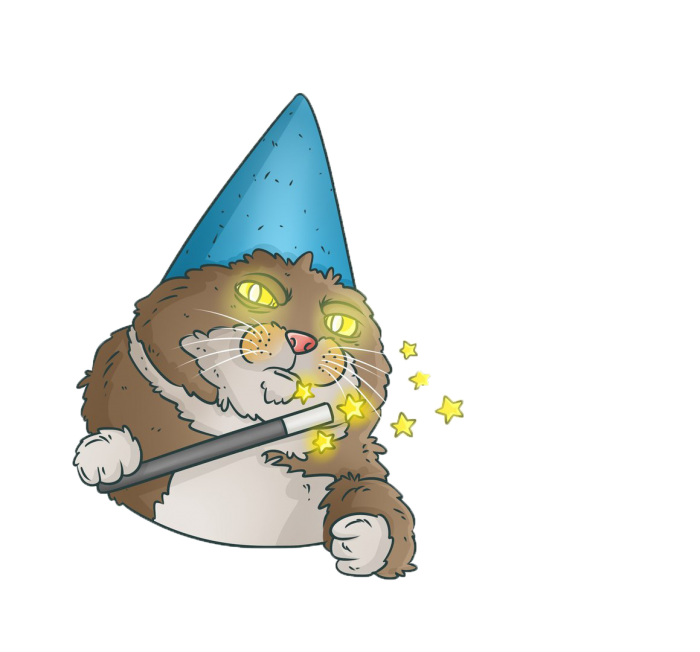

Усі елементи набору даних однакові

In [8]:
def get_identical_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append([0x5f3759df]*size)   # :)
    return res

get_identical_elements(5, 2) 

[[1597463007, 1597463007, 1597463007, 1597463007, 1597463007],
 [1597463007, 1597463007, 1597463007, 1597463007, 1597463007]]

Відсортований набір даних

In [9]:
def get_sorted_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append(list(range(size)))
    return res

get_sorted_elements(5, 2)

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]

Відсортованй у зворотньому порядку набір даних

In [10]:
def get_reverse_sorted_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append(list(range(size - 1, -1, -1)))
    return res

get_reverse_sorted_elements(5, 2)

[[4, 3, 2, 1, 0], [4, 3, 2, 1, 0]]

Випадковий набір даних

In [11]:
def get_random_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append([random.randint(0, size + 1) for _ in range(size)])
    return res

get_random_elements(5, 2)

[[6, 1, 1, 3, 6], [0, 0, 1, 2, 5]]

Майже відсортований набір даних

In [12]:
def get_almost_sorted_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        tmp = list(range(size))
        for i in range(1, size):
            if random.random() >= 0.8:
                tmp[i], tmp[i - 1] = tmp[i - 1], tmp[i]
        res.append(tmp)
    return res

get_almost_sorted_elements(5, 2)

[[0, 2, 3, 1, 4], [0, 1, 2, 3, 4]]

Трикутний набір даних

In [13]:
def get_triangular_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append([*list(range(size//2 + size%2)), *list(range(size//2 - 1, -1, -1))])
    return res

get_triangular_elements(5, 2)

[[0, 1, 2, 1, 0], [0, 1, 2, 1, 0]]

Декілька унікальних елементів у набору даних

In [14]:
def get_few_unique_elements(size: int, amount: int):
    res = []
    for _ in range(amount):
        res.append([random.randint(0, size//2) for _ in range(size)])
    return res

get_few_unique_elements(5, 2)

[[1, 1, 1, 0, 0], [2, 0, 0, 0, 2]]

### Пункт $(в)$
3-стороннє розбиття

In [15]:
def partition_random_median_3(A, p, r):
    if r-p >= 2:
        indexes = random.sample(range(p, r + 1), k=3)
        metrics.memory_usage += indexes.__sizeof__()
        values = [(A[i], i) for i in indexes]
        metrics.memory_usage += values.__sizeof__()
        values.sort()
        metrics.comparisons += 3
        index = values[1][1]
    else:
        index = random.randint(p, r)
    metrics.memory_usage += index.__sizeof__()
    # swap
    metrics.swap += 1
    A[index], A[p] = A[p], A[index]
    return Partion3(A, p, r)
     

def Partion3(A, p, r):
    x = A[p]
    metrics.memory_usage += x.__sizeof__()
    i = k = p
    metrics.memory_usage += k.__sizeof__()
    metrics.memory_usage += i.__sizeof__()
    j = r
    metrics.memory_usage += j.__sizeof__()
    
    while k <= j:
        metrics.comparisons += 1
        if A[k] < x:
            # swap
            metrics.swap += 1
            A[k], A[i] = A[i], A[k]
            i += 1
            k += 1
        elif A[k] == x:
            k += 1
        else:
            # swap
            metrics.swap += 1
            A[k], A[j] = A[j], A[k]
            j -= 1
    
    return i, j

def quick_sort_3(A, p = None, r = None):
    stack = [(0, len(A) - 1)]

    while stack:
        p, r = stack.pop()
        if p < r:
            i, j = Partion3(A, p, r)
            stack.append((p, i - 1))
            stack.append((j + 1, r))


In [16]:
test_data = [random.randint(1, 100) for _ in range(11)]
print(f"Before sorting: {test_data}")

metrics.reset()
test_data_3 = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_3(test_data_3)
end_time = time.time() - start_time

print(f"After sorting: \t{test_data_3}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")
print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

Before sorting: [94, 5, 33, 30, 85, 23, 68, 39, 1, 29, 8]
After sorting: 	[1, 5, 8, 23, 29, 30, 33, 39, 68, 85, 94]
Swap: 39
Comparisons: 46
Memory usage: 784
Time: 0.0


### Пункт $(г)$
З двома опорними елементами

In [17]:
def PartionDual(A, p, r):
    pivot1 = A[p]
    pivot2 = A[r]

    # Перевіряємо порядок півотів
    
    if pivot1 > pivot2:
        A[p], A[r] = A[r], A[p]
        pivot1, pivot2 = pivot2, pivot1
        metrics.swap += 1

    metrics.memory_usage += pivot1.__sizeof__() + pivot2.__sizeof__()
    i = p + 1
    k = i
    j = r - 1
    metrics.memory_usage += i.__sizeof__() + j.__sizeof__() + k.__sizeof__()

    while k <= j:
        metrics.comparisons += 1
        if A[k] < pivot1:
            metrics.swap += 1
            A[k], A[i] = A[i], A[k]
            i += 1
            k += 1
        elif A[k] > pivot2:
            metrics.swap += 1
            A[k], A[j] = A[j], A[k]
            j -= 1
        else:
            k += 1

    i -= 1
    j += 1
    A[p], A[i] = A[i], A[p]
    A[r], A[j] = A[j], A[r]
    metrics.swap += 2
    return i, j

def quick_sort_dual(A):
    stack = [(0, len(A) - 1)]

    while stack:
        p, r = stack.pop()
        if p < r:
            i, j = PartionDual(A, p, r)
            
            stack.append((p, i - 1))
            stack.append((i + 1, j - 1))
            stack.append((j + 1, r))

In [18]:
test_data = [random.randint(1, 100) for _ in range(11)]
print(f"Before sorting: {test_data}")

metrics.reset()
test_data_dual = copy.deepcopy(test_data)
start_time = time.time()
quick_sort_dual(test_data_dual)
end_time = time.time() - start_time

print(f"After sorting: \t{test_data_dual}")
print(f"Swap: {metrics.swap}")
print(f"Comparisons: {metrics.comparisons}")

print(f"Memory usage: {metrics.memory_usage}")
print(f"Time: {end_time}")

Before sorting: [27, 73, 15, 27, 7, 15, 67, 16, 63, 75, 89]
After sorting: 	[7, 15, 15, 16, 27, 27, 63, 67, 73, 75, 89]
Swap: 16
Comparisons: 15
Memory usage: 560
Time: 0.0


### Пункт $(д)$
Порівняльний аналіз, графіки

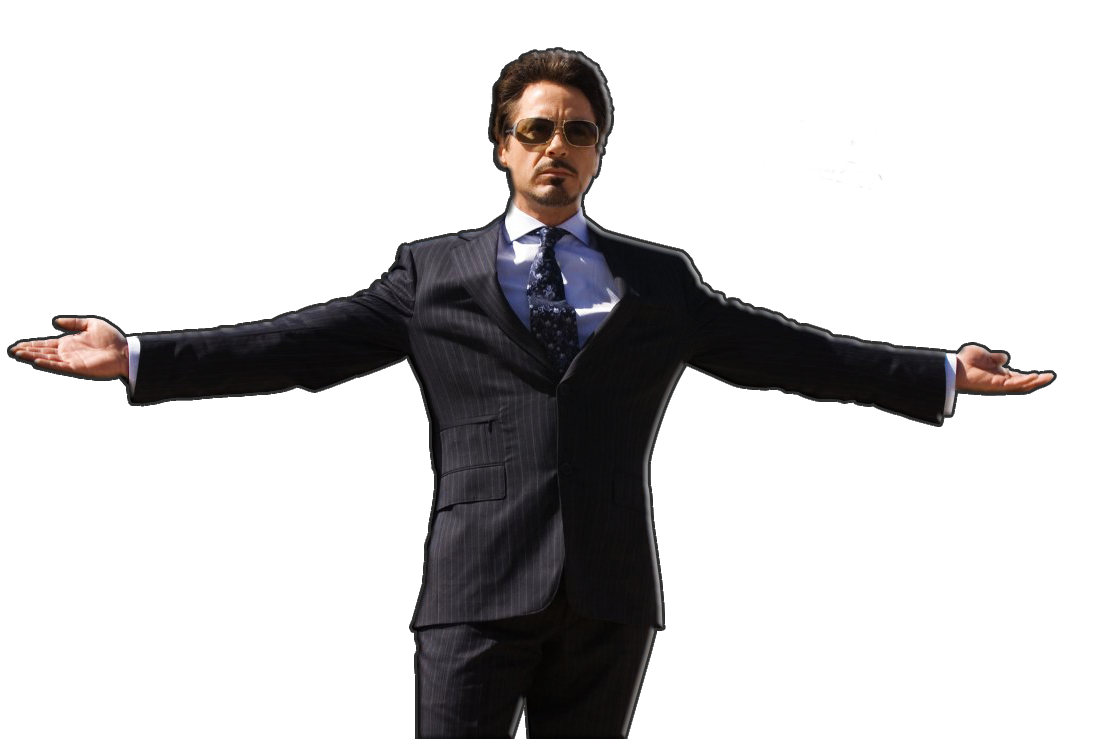

In [19]:
X = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10_000]
amount = 10

In [20]:
# Чорна магія

get_elements = [get_identical_elements,
                get_sorted_elements,
                get_reverse_sorted_elements,
                get_random_elements,
                get_almost_sorted_elements,
                get_triangular_elements,
                get_few_unique_elements]

sort_func = [quick_sort_3, 
             quick_sort_dual]

lomuto_methods = [lomuto_partition_first,
                  lomuto_partition_first,
                  lomuto_partition_random, 
                  lomuto_partition_median, 
                  lomuto_partition_random_median]

hoare_methods = [hoare_partition_last,
                  hoare_partition_first,
                  hoare_partition_random, 
                  hoare_partition_median, 
                  hoare_partition_random_median]


Lomuto

In [21]:
# last

Y_lomuto_last_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_last)
    Y_lomuto_last_identical["time"].append((time.time() - start_time) / amount)
    Y_lomuto_last_identical["swap"].append(metrics.swap / amount)
    Y_lomuto_last_identical["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_last_identical["memory"].append(metrics.memory_usage / amount)


Y_lomuto_last_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_last)
    Y_lomuto_last_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_last_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_last_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_last_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_last_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_last)
    Y_lomuto_last_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_last_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_last_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_last_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_last_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_last)
    Y_lomuto_last_random["time"].append((time.time() - start_time) / amount)
    Y_lomuto_last_random["swap"].append(metrics.swap / amount)
    Y_lomuto_last_random["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_last_random["memory"].append(metrics.memory_usage / amount)


Y_lomuto_last_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_last)
    Y_lomuto_last_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_last_almost_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_last_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_last_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_last_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_last)
    Y_lomuto_last_triangular["time"].append((time.time() - start_time) / amount)
    Y_lomuto_last_triangular["swap"].append(metrics.swap / amount)
    Y_lomuto_last_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_last_triangular["memory"].append(metrics.memory_usage / amount)


Y_lomuto_last_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_last)
    Y_lomuto_last_few_unique["time"].append((time.time() - start_time) / amount)
    Y_lomuto_last_few_unique["swap"].append(metrics.swap / amount)
    Y_lomuto_last_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_last_few_unique["memory"].append(metrics.memory_usage / amount)

In [22]:
# first

Y_lomuto_first_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_first)
    Y_lomuto_first_identical["time"].append((time.time() - start_time) / amount)
    Y_lomuto_first_identical["swap"].append(metrics.swap / amount)
    Y_lomuto_first_identical["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_first_identical["memory"].append(metrics.memory_usage / amount)


Y_lomuto_first_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_first)
    Y_lomuto_first_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_first_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_first_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_first_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_first_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_first)
    Y_lomuto_first_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_first_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_first_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_first_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_first_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_first)
    Y_lomuto_first_random["time"].append((time.time() - start_time) / amount)
    Y_lomuto_first_random["swap"].append(metrics.swap / amount)
    Y_lomuto_first_random["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_first_random["memory"].append(metrics.memory_usage / amount)


Y_lomuto_first_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_first)
    Y_lomuto_first_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_first_almost_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_first_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_first_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_first_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_first)
    Y_lomuto_first_triangular["time"].append((time.time() - start_time) / amount)
    Y_lomuto_first_triangular["swap"].append(metrics.swap / amount)
    Y_lomuto_first_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_first_triangular["memory"].append(metrics.memory_usage / amount)


Y_lomuto_first_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_first)
    Y_lomuto_first_few_unique["time"].append((time.time() - start_time) / amount)
    Y_lomuto_first_few_unique["swap"].append(metrics.swap / amount)
    Y_lomuto_first_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_first_few_unique["memory"].append(metrics.memory_usage / amount)

In [23]:
# random

Y_lomuto_random_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random)
    Y_lomuto_random_identical["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_identical["swap"].append(metrics.swap / amount)
    Y_lomuto_random_identical["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_identical["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random)
    Y_lomuto_random_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_random_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random)
    Y_lomuto_random_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_random_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random)
    Y_lomuto_random_random["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_random["swap"].append(metrics.swap / amount)
    Y_lomuto_random_random["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_random["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random)
    Y_lomuto_random_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_almost_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_random_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random)
    Y_lomuto_random_triangular["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_triangular["swap"].append(metrics.swap / amount)
    Y_lomuto_random_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_triangular["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random)
    Y_lomuto_random_few_unique["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_few_unique["swap"].append(metrics.swap / amount)
    Y_lomuto_random_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_few_unique["memory"].append(metrics.memory_usage / amount)

In [24]:
# median

Y_lomuto_median_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_median)
    Y_lomuto_median_identical["time"].append((time.time() - start_time) / amount)
    Y_lomuto_median_identical["swap"].append(metrics.swap / amount)
    Y_lomuto_median_identical["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_median_identical["memory"].append(metrics.memory_usage / amount)


Y_lomuto_median_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_median)
    Y_lomuto_median_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_median_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_median_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_median_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_median_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_median)
    Y_lomuto_median_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_median_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_median_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_median_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_median_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# median
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_median)
    Y_lomuto_median_random["time"].append((time.time() - start_time) / amount)
    Y_lomuto_median_random["swap"].append(metrics.swap / amount)
    Y_lomuto_median_random["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_median_random["memory"].append(metrics.memory_usage / amount)


Y_lomuto_median_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_median)
    Y_lomuto_median_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_median_almost_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_median_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_median_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_median_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_median)
    Y_lomuto_median_triangular["time"].append((time.time() - start_time) / amount)
    Y_lomuto_median_triangular["swap"].append(metrics.swap / amount)
    Y_lomuto_median_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_median_triangular["memory"].append(metrics.memory_usage / amount)


Y_lomuto_median_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_median)
    Y_lomuto_median_few_unique["time"].append((time.time() - start_time) / amount)
    Y_lomuto_median_few_unique["swap"].append(metrics.swap / amount)
    Y_lomuto_median_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_median_few_unique["memory"].append(metrics.memory_usage / amount)

In [25]:
# random_median

Y_lomuto_random_median_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random_median)
    Y_lomuto_random_median_identical["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_median_identical["swap"].append(metrics.swap / amount)
    Y_lomuto_random_median_identical["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_median_identical["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_median_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random_median)
    Y_lomuto_random_median_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_median_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_random_median_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_median_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_median_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random_median)
    Y_lomuto_random_median_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_median_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_random_median_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_median_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_median_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random_median
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random_median)
    Y_lomuto_random_median_random["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_median_random["swap"].append(metrics.swap / amount)
    Y_lomuto_random_median_random["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_median_random["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_median_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random_median)
    Y_lomuto_random_median_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_median_almost_sorted["swap"].append(metrics.swap / amount)
    Y_lomuto_random_median_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_median_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_median_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random_median)
    Y_lomuto_random_median_triangular["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_median_triangular["swap"].append(metrics.swap / amount)
    Y_lomuto_random_median_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_median_triangular["memory"].append(metrics.memory_usage / amount)


Y_lomuto_random_median_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_lomuto(arr, lomuto_partition_random_median)
    Y_lomuto_random_median_few_unique["time"].append((time.time() - start_time) / amount)
    Y_lomuto_random_median_few_unique["swap"].append(metrics.swap / amount)
    Y_lomuto_random_median_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_lomuto_random_median_few_unique["memory"].append(metrics.memory_usage / amount)

Hoare

In [26]:
# last

Y_hoare_last_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_last)
    Y_hoare_last_identical["time"].append((time.time() - start_time) / amount)
    Y_hoare_last_identical["swap"].append(metrics.swap / amount)
    Y_hoare_last_identical["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_last_identical["memory"].append(metrics.memory_usage / amount)

Y_hoare_last_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_last)
    Y_hoare_last_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_last_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_last_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_last_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_last_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_last)
    Y_hoare_last_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_last_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_last_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_last_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_last_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_last)
    Y_hoare_last_random["time"].append((time.time() - start_time) / amount)
    Y_hoare_last_random["swap"].append(metrics.swap / amount)
    Y_hoare_last_random["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_last_random["memory"].append(metrics.memory_usage / amount)


Y_hoare_last_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_last)
    Y_hoare_last_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_last_almost_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_last_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_last_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_last_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_last)
    Y_hoare_last_triangular["time"].append((time.time() - start_time) / amount)
    Y_hoare_last_triangular["swap"].append(metrics.swap / amount)
    Y_hoare_last_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_last_triangular["memory"].append(metrics.memory_usage / amount)


Y_hoare_last_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_last)
    Y_hoare_last_few_unique["time"].append((time.time() - start_time) / amount)
    Y_hoare_last_few_unique["swap"].append(metrics.swap / amount)
    Y_hoare_last_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_last_few_unique["memory"].append(metrics.memory_usage / amount)

In [27]:
# first

Y_hoare_first_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_first)
    Y_hoare_first_identical["time"].append((time.time() - start_time) / amount)
    Y_hoare_first_identical["swap"].append(metrics.swap / amount)
    Y_hoare_first_identical["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_first_identical["memory"].append(metrics.memory_usage / amount)


Y_hoare_first_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_first)
    Y_hoare_first_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_first_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_first_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_first_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_first_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_first)
    Y_hoare_first_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_first_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_first_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_first_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_first_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_first)
    Y_hoare_first_random["time"].append((time.time() - start_time) / amount)
    Y_hoare_first_random["swap"].append(metrics.swap / amount)
    Y_hoare_first_random["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_first_random["memory"].append(metrics.memory_usage / amount)


Y_hoare_first_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_first)
    Y_hoare_first_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_first_almost_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_first_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_first_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_first_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_first)
    Y_hoare_first_triangular["time"].append((time.time() - start_time) / amount)
    Y_hoare_first_triangular["swap"].append(metrics.swap / amount)
    Y_hoare_first_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_first_triangular["memory"].append(metrics.memory_usage / amount)


Y_hoare_first_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_first)
    Y_hoare_first_few_unique["time"].append((time.time() - start_time) / amount)
    Y_hoare_first_few_unique["swap"].append(metrics.swap / amount)
    Y_hoare_first_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_first_few_unique["memory"].append(metrics.memory_usage / amount)

In [28]:
# random

Y_hoare_random_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random)
    Y_hoare_random_identical["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_identical["swap"].append(metrics.swap / amount)
    Y_hoare_random_identical["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_identical["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random)
    Y_hoare_random_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_random_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random)
    Y_hoare_random_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_random_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random)
    Y_hoare_random_random["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_random["swap"].append(metrics.swap / amount)
    Y_hoare_random_random["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_random["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random)
    Y_hoare_random_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_almost_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_random_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random)
    Y_hoare_random_triangular["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_triangular["swap"].append(metrics.swap / amount)
    Y_hoare_random_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_triangular["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random)
    Y_hoare_random_few_unique["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_few_unique["swap"].append(metrics.swap / amount)
    Y_hoare_random_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_few_unique["memory"].append(metrics.memory_usage / amount)

In [29]:
# median

Y_hoare_median_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_median)
    Y_hoare_median_identical["time"].append((time.time() - start_time) / amount)
    Y_hoare_median_identical["swap"].append(metrics.swap / amount)
    Y_hoare_median_identical["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_median_identical["memory"].append(metrics.memory_usage / amount)


Y_hoare_median_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_median)
    Y_hoare_median_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_median_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_median_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_median_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_median_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_median)
    Y_hoare_median_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_median_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_median_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_median_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_median_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# median
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_median)
    Y_hoare_median_random["time"].append((time.time() - start_time) / amount)
    Y_hoare_median_random["swap"].append(metrics.swap / amount)
    Y_hoare_median_random["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_median_random["memory"].append(metrics.memory_usage / amount)


Y_hoare_median_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_median)
    Y_hoare_median_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_median_almost_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_median_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_median_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_median_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_median)
    Y_hoare_median_triangular["time"].append((time.time() - start_time) / amount)
    Y_hoare_median_triangular["swap"].append(metrics.swap / amount)
    Y_hoare_median_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_median_triangular["memory"].append(metrics.memory_usage / amount)


Y_hoare_median_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_median)
    Y_hoare_median_few_unique["time"].append((time.time() - start_time) / amount)
    Y_hoare_median_few_unique["swap"].append(metrics.swap / amount)
    Y_hoare_median_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_median_few_unique["memory"].append(metrics.memory_usage / amount)

In [30]:
# random_median

Y_hoare_random_median_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random_median)
    Y_hoare_random_median_identical["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_median_identical["swap"].append(metrics.swap / amount)
    Y_hoare_random_median_identical["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_median_identical["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_median_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random_median)
    Y_hoare_random_median_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_median_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_random_median_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_median_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_median_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random_median)
    Y_hoare_random_median_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_median_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_random_median_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_median_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_median_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random_median
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random_median)
    Y_hoare_random_median_random["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_median_random["swap"].append(metrics.swap / amount)
    Y_hoare_random_median_random["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_median_random["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_median_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random_median)
    Y_hoare_random_median_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_median_almost_sorted["swap"].append(metrics.swap / amount)
    Y_hoare_random_median_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_median_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_median_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random_median)
    Y_hoare_random_median_triangular["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_median_triangular["swap"].append(metrics.swap / amount)
    Y_hoare_random_median_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_median_triangular["memory"].append(metrics.memory_usage / amount)


Y_hoare_random_median_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_hoare(arr, hoare_partition_random_median)
    Y_hoare_random_median_few_unique["time"].append((time.time() - start_time) / amount)
    Y_hoare_random_median_few_unique["swap"].append(metrics.swap / amount)
    Y_hoare_random_median_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_hoare_random_median_few_unique["memory"].append(metrics.memory_usage / amount)

3-way

In [31]:
# 3-way

Y_3_way_random_median_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_3(arr)
    Y_3_way_random_median_identical["time"].append((time.time() - start_time) / amount)
    Y_3_way_random_median_identical["swap"].append(metrics.swap / amount)
    Y_3_way_random_median_identical["comparisons"].append(metrics.comparisons / amount)
    Y_3_way_random_median_identical["memory"].append(metrics.memory_usage / amount)


Y_3_way_random_median_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_3(arr)
    Y_3_way_random_median_sorted["time"].append((time.time() - start_time) / amount)
    Y_3_way_random_median_sorted["swap"].append(metrics.swap / amount)
    Y_3_way_random_median_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_3_way_random_median_sorted["memory"].append(metrics.memory_usage / amount)


Y_3_way_random_median_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_3(arr)
    Y_3_way_random_median_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_3_way_random_median_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_3_way_random_median_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_3_way_random_median_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_3_way_random_median_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random_median
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_3(arr)
    Y_3_way_random_median_random["time"].append((time.time() - start_time) / amount)
    Y_3_way_random_median_random["swap"].append(metrics.swap / amount)
    Y_3_way_random_median_random["comparisons"].append(metrics.comparisons / amount)
    Y_3_way_random_median_random["memory"].append(metrics.memory_usage / amount)


Y_3_way_random_median_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_3(arr)
    Y_3_way_random_median_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_3_way_random_median_almost_sorted["swap"].append(metrics.swap / amount)
    Y_3_way_random_median_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_3_way_random_median_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_3_way_random_median_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_3(arr)
    Y_3_way_random_median_triangular["time"].append((time.time() - start_time) / amount)
    Y_3_way_random_median_triangular["swap"].append(metrics.swap / amount)
    Y_3_way_random_median_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_3_way_random_median_triangular["memory"].append(metrics.memory_usage / amount)


Y_3_way_random_median_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_3(arr)
    Y_3_way_random_median_few_unique["time"].append((time.time() - start_time) / amount)
    Y_3_way_random_median_few_unique["swap"].append(metrics.swap / amount)
    Y_3_way_random_median_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_3_way_random_median_few_unique["memory"].append(metrics.memory_usage / amount)

Dual

In [32]:
# dual

Y_dual_random_median_identical = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# indentical
for x in X:
    metrics.reset()
    test_arr = get_identical_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_dual(arr)
    Y_dual_random_median_identical["time"].append((time.time() - start_time) / amount)
    Y_dual_random_median_identical["swap"].append(metrics.swap / amount)
    Y_dual_random_median_identical["comparisons"].append(metrics.comparisons / amount)
    Y_dual_random_median_identical["memory"].append(metrics.memory_usage / amount)


Y_dual_random_median_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# sorted
for x in X:
    metrics.reset()
    test_arr = get_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_dual(arr)
    Y_dual_random_median_sorted["time"].append((time.time() - start_time) / amount)
    Y_dual_random_median_sorted["swap"].append(metrics.swap / amount)
    Y_dual_random_median_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_dual_random_median_sorted["memory"].append(metrics.memory_usage / amount)


Y_dual_random_median_reverse_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# reverse sorted
for x in X:
    metrics.reset()
    test_arr = get_reverse_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_dual(arr)
    Y_dual_random_median_reverse_sorted["time"].append((time.time() - start_time) / amount)
    Y_dual_random_median_reverse_sorted["swap"].append(metrics.swap / amount)
    Y_dual_random_median_reverse_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_dual_random_median_reverse_sorted["memory"].append(metrics.memory_usage / amount)


Y_dual_random_median_random = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# random_median
for x in X:
    metrics.reset()
    test_arr = get_random_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_dual(arr)
    Y_dual_random_median_random["time"].append((time.time() - start_time) / amount)
    Y_dual_random_median_random["swap"].append(metrics.swap / amount)
    Y_dual_random_median_random["comparisons"].append(metrics.comparisons / amount)
    Y_dual_random_median_random["memory"].append(metrics.memory_usage / amount)


Y_dual_random_median_almost_sorted = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# almost sorted
for x in X:
    metrics.reset()
    test_arr = get_almost_sorted_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_dual(arr)
    Y_dual_random_median_almost_sorted["time"].append((time.time() - start_time) / amount)
    Y_dual_random_median_almost_sorted["swap"].append(metrics.swap / amount)
    Y_dual_random_median_almost_sorted["comparisons"].append(metrics.comparisons / amount)
    Y_dual_random_median_almost_sorted["memory"].append(metrics.memory_usage / amount)


Y_dual_random_median_triangular = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# triangular
for x in X:
    metrics.reset()
    test_arr = get_triangular_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_dual(arr)
    Y_dual_random_median_triangular["time"].append((time.time() - start_time) / amount)
    Y_dual_random_median_triangular["swap"].append(metrics.swap / amount)
    Y_dual_random_median_triangular["comparisons"].append(metrics.comparisons / amount)
    Y_dual_random_median_triangular["memory"].append(metrics.memory_usage / amount)


Y_dual_random_median_few_unique = {"time" : [],
                           "swap" : [],
                           "comparisons" : [],
                           "memory" : []}
# few unique
for x in X:
    metrics.reset()
    test_arr = get_few_unique_elements(x, amount)
    
    start_time = time.time()
    for arr in test_arr:
        quick_sort_dual(arr)
    Y_dual_random_median_few_unique["time"].append((time.time() - start_time) / amount)
    Y_dual_random_median_few_unique["swap"].append(metrics.swap / amount)
    Y_dual_random_median_few_unique["comparisons"].append(metrics.comparisons / amount)
    Y_dual_random_median_few_unique["memory"].append(metrics.memory_usage / amount)

In [33]:
names = ["3-стороннє", "з двома опорними", "Ломуто з першим елементом як опорний", 
         "Ломуто з останнім елементом як опорний", "Ломуто з випадковим елементом як опорний", 
         "Ломуто з опорним елементом як медіана першого, останнього та центрального", 
         "Ломуто з опорним елементом як медіана 3-ьох випадкових", 
         "Гоар з першим елементом як опорний", 
         "Гоар з останнім елементом як опорний", 
         "Гоар з випадковим елементом як опорний", 
         "Гоар з опорним елементом як медіана першого, останнього та центрального", 
         "Гоар з опорним елементом як медіана 3-ьох випадкових"]

Час

In [34]:
Y_identical = [Y_3_way_random_median_identical,
               Y_dual_random_median_identical,
               Y_lomuto_first_identical,
               Y_lomuto_last_identical,
               Y_lomuto_random_identical,
               Y_lomuto_median_identical,
               Y_lomuto_random_median_identical,
               Y_hoare_first_identical,
               Y_hoare_last_identical,
               Y_hoare_random_identical,
               Y_hoare_median_identical,
               Y_hoare_random_median_identical]

In [35]:
Y_sorted = [Y_3_way_random_median_sorted,
               Y_dual_random_median_sorted,
               Y_lomuto_first_sorted,
               Y_lomuto_last_sorted,
               Y_lomuto_random_sorted,
               Y_lomuto_median_sorted,
               Y_lomuto_random_median_sorted,
               Y_hoare_first_sorted,
               Y_hoare_last_sorted,
               Y_hoare_random_sorted,
               Y_hoare_median_sorted,
               Y_hoare_random_median_sorted]

In [36]:
Y_reverse_sorted = [Y_3_way_random_median_reverse_sorted,
               Y_dual_random_median_reverse_sorted,
               Y_lomuto_first_reverse_sorted,
               Y_lomuto_last_reverse_sorted,
               Y_lomuto_random_reverse_sorted,
               Y_lomuto_median_reverse_sorted,
               Y_lomuto_random_median_reverse_sorted,
               Y_hoare_first_reverse_sorted,
               Y_hoare_last_reverse_sorted,
               Y_hoare_random_reverse_sorted,
               Y_hoare_median_reverse_sorted,
               Y_hoare_random_median_reverse_sorted]

In [37]:
Y_random = [Y_3_way_random_median_random,
               Y_dual_random_median_random,
               Y_lomuto_first_random,
               Y_lomuto_last_random,
               Y_lomuto_random_random,
               Y_lomuto_median_random,
               Y_lomuto_random_median_random,
               Y_hoare_first_random,
               Y_hoare_last_random,
               Y_hoare_random_random,
               Y_hoare_median_random,
               Y_hoare_random_median_random]

In [38]:
Y_almost_sorted = [Y_3_way_random_median_almost_sorted,
               Y_dual_random_median_almost_sorted,
               Y_lomuto_first_almost_sorted,
               Y_lomuto_last_almost_sorted,
               Y_lomuto_random_almost_sorted,
               Y_lomuto_median_almost_sorted,
               Y_lomuto_random_median_almost_sorted,
               Y_hoare_first_almost_sorted,
               Y_hoare_last_almost_sorted,
               Y_hoare_random_almost_sorted,
               Y_hoare_median_almost_sorted,
               Y_hoare_random_median_almost_sorted]

In [39]:
Y_triangular = [Y_3_way_random_median_triangular,
               Y_dual_random_median_triangular,
               Y_lomuto_first_triangular,
               Y_lomuto_last_triangular,
               Y_lomuto_random_triangular,
               Y_lomuto_median_triangular,
               Y_lomuto_random_median_triangular,
               Y_hoare_first_triangular,
               Y_hoare_last_triangular,
               Y_hoare_random_triangular,
               Y_hoare_median_triangular,
               Y_hoare_random_median_triangular]

In [40]:
Y_few_unique = [Y_3_way_random_median_few_unique,
               Y_dual_random_median_few_unique,
               Y_lomuto_first_few_unique,
               Y_lomuto_last_few_unique,
               Y_lomuto_random_few_unique,
               Y_lomuto_median_few_unique,
               Y_lomuto_random_median_few_unique,
               Y_hoare_first_few_unique,
               Y_hoare_last_few_unique,
               Y_hoare_random_few_unique,
               Y_hoare_median_few_unique,
               Y_hoare_random_median_few_unique]

Text(0.5, 1.0, 'Однакові')

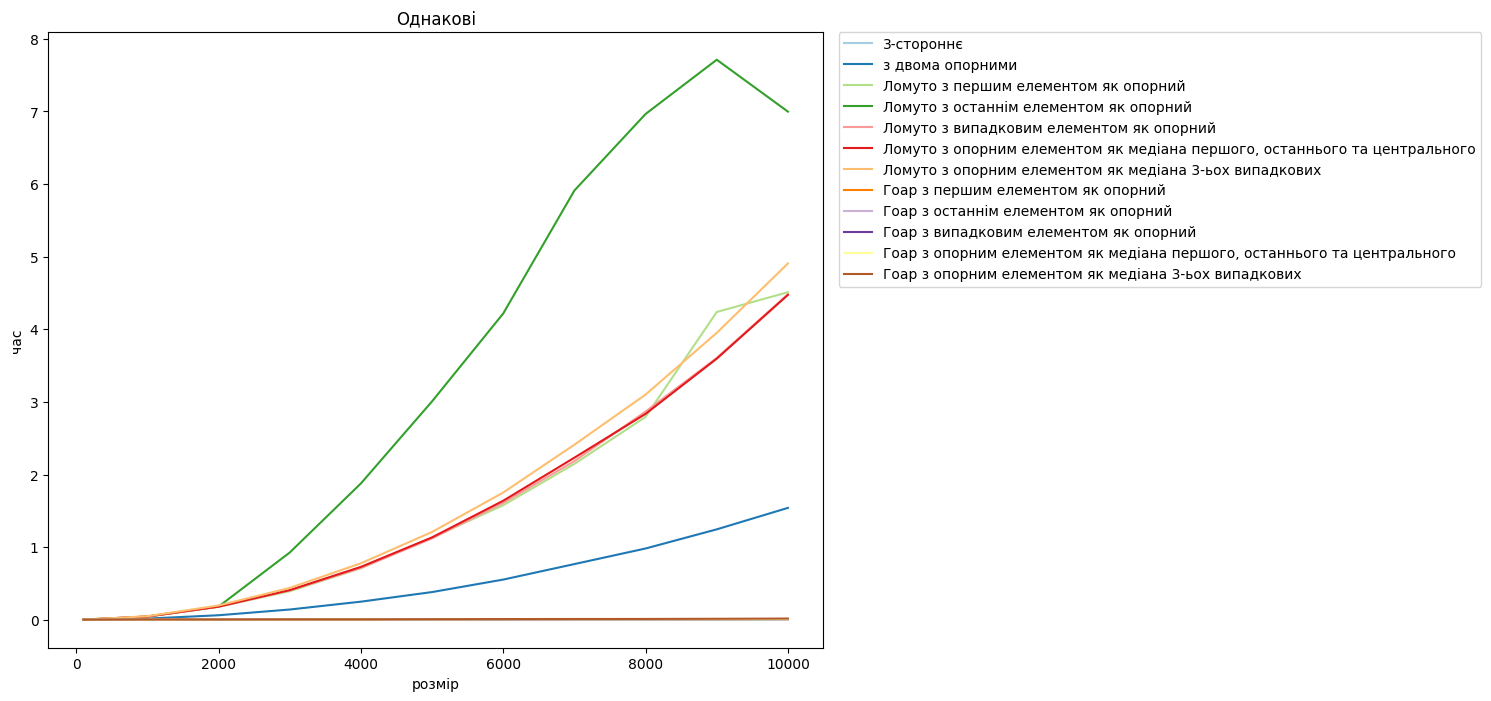

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(Y_identical)):
    ax.plot(X, Y_identical[i]["time"], color=plt.colormaps["Paired"].colors[i], label=names[i])
    # plt.plot(X, Y_identical[i]["swap"], color=color[i], label="swap")
    # plt.plot(X, Y_identical[i]["comparisons"], color=color[i], label="comparisons")
    # plt.plot(X, Y_identical[i]["memory"], color=color[i], label="memory")
    ax.set_xlabel("розмір")
    ax.set_ylabel("час")
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title("Однакові")

Text(0.5, 1.0, 'Однакові')

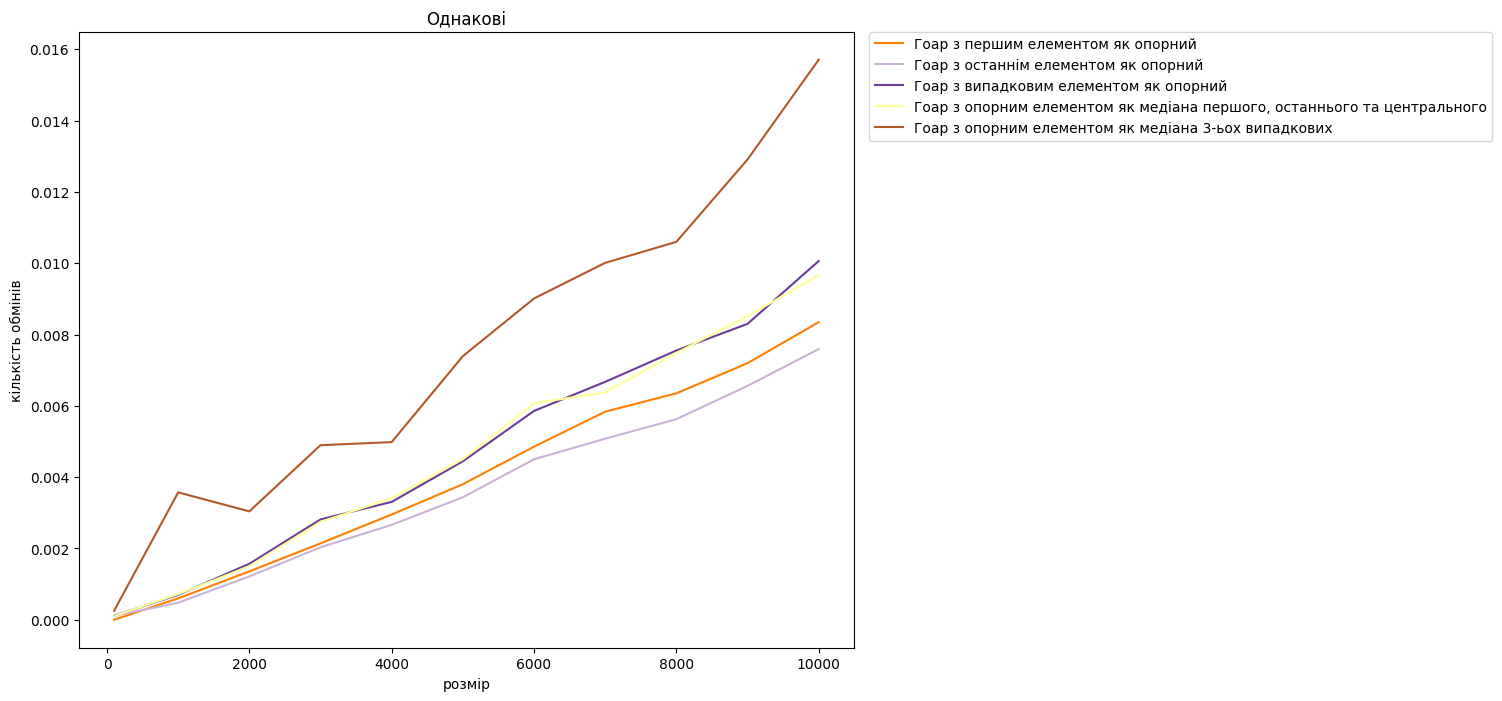

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(Y_identical)):
    if Y_identical[i] not in Y_identical[: 7]:
        ax.plot(X, Y_identical[i]["time"], color=plt.colormaps["Paired"].colors[i], label=names[i])

        ax.set_xlabel("розмір")
        ax.set_ylabel("кількість обмінів")
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title("Однакові")

Обміни

Text(0.5, 1.0, 'Однакові')

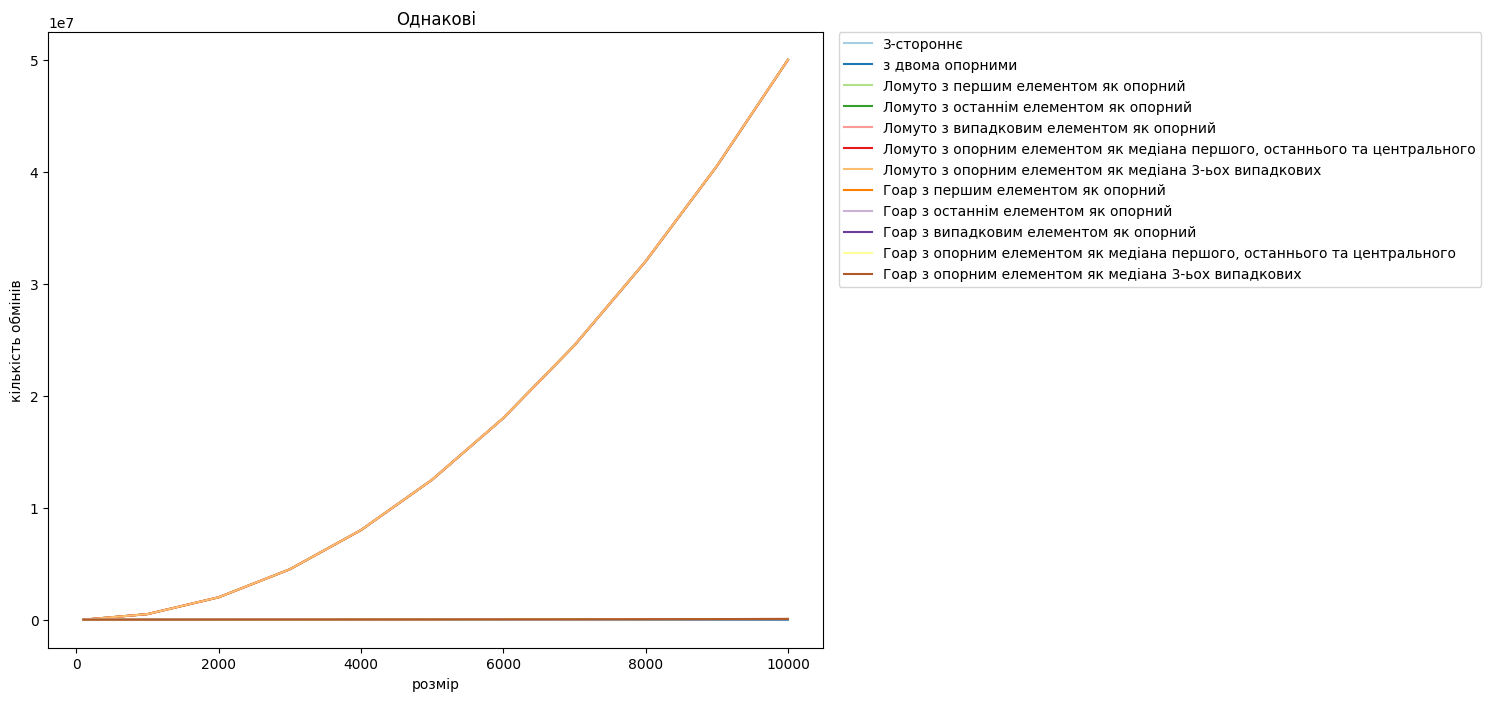

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(Y_identical)):
    ax.plot(X, Y_identical[i]["swap"], color=plt.colormaps["Paired"].colors[i], label=names[i])

    ax.set_xlabel("розмір")
    ax.set_ylabel("кількість обмінів")
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title("Однакові")

Text(0.5, 1.0, 'Однакові')

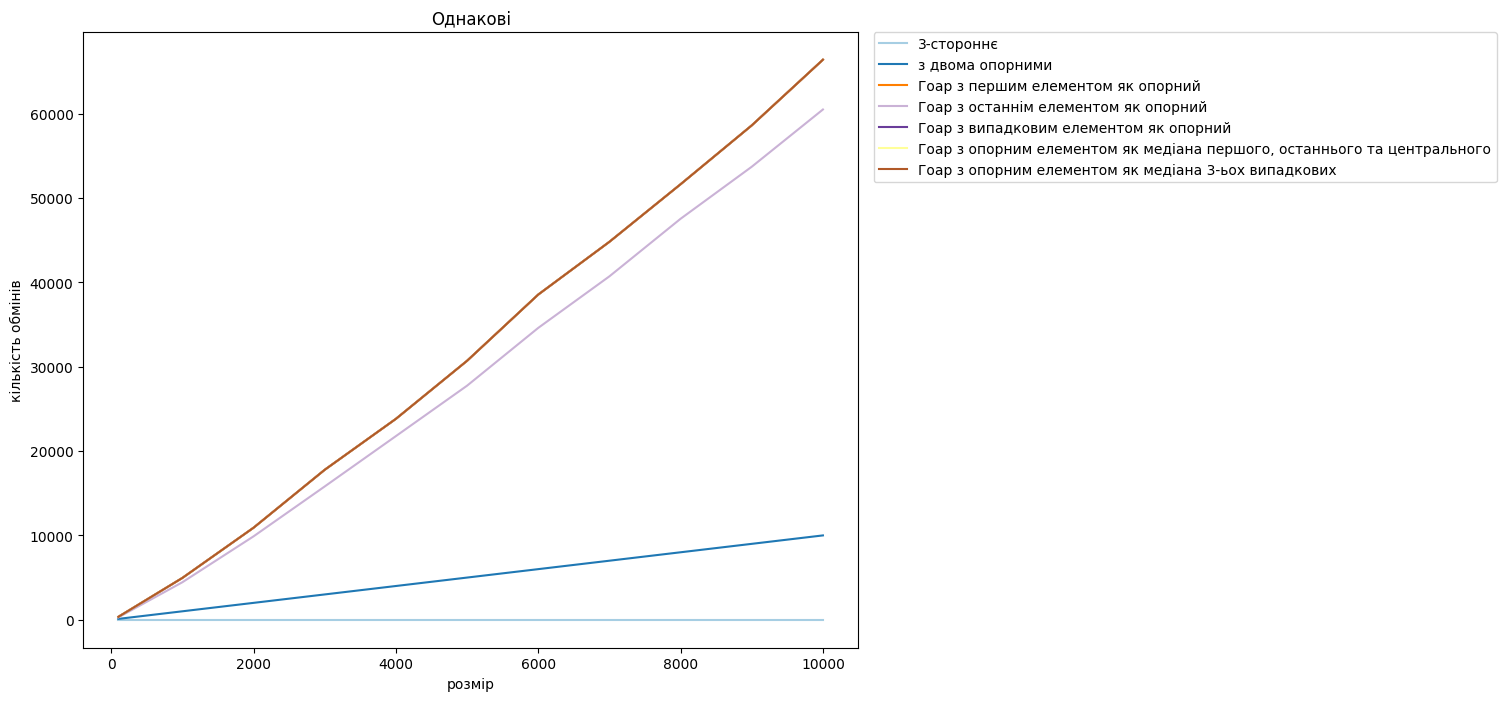

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(Y_identical)):
    if Y_identical[i] not in Y_identical[2: 7]:
        ax.plot(X, Y_identical[i]["swap"], color=plt.colormaps["Paired"].colors[i], label=names[i])

        ax.set_xlabel("розмір")
        ax.set_ylabel("кількість обмінів")
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title("Однакові")

Порівняння

Text(0.5, 1.0, 'Однакові')

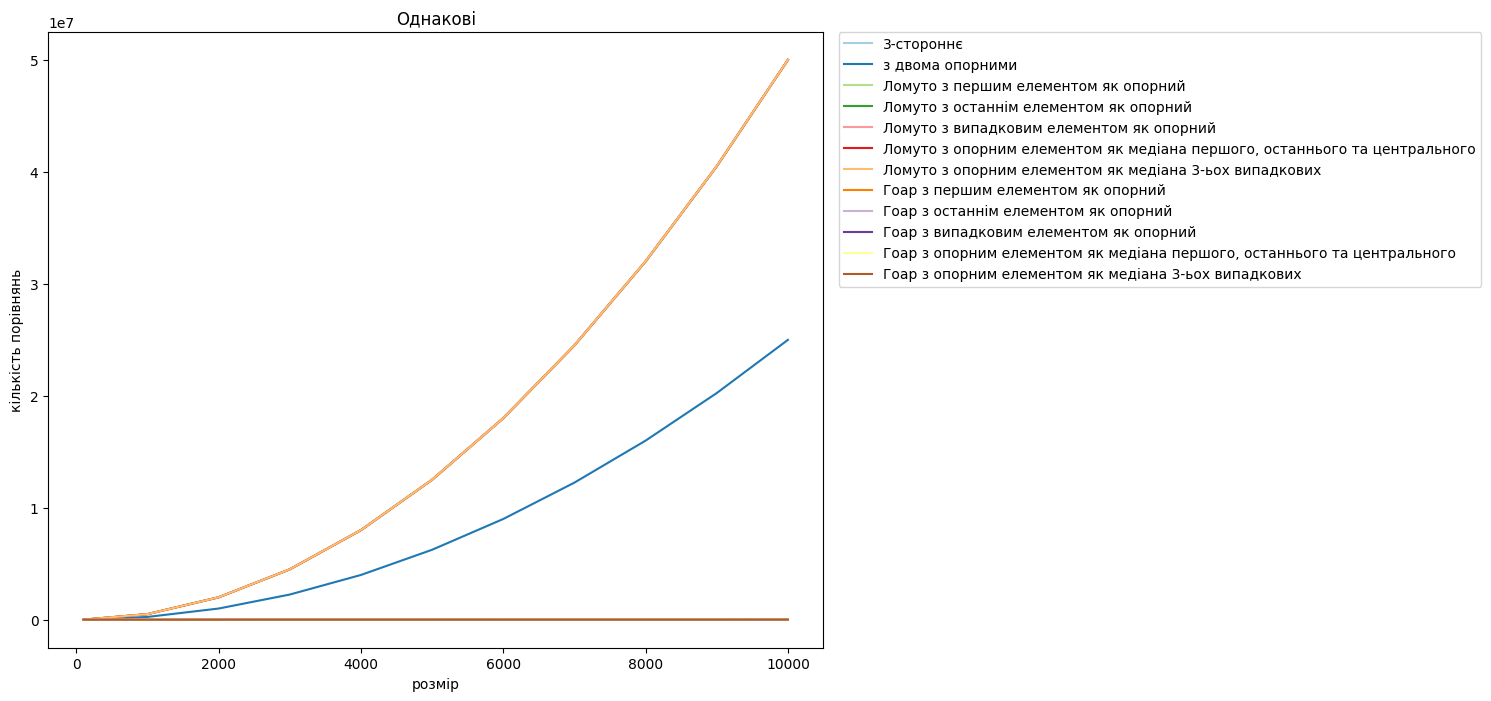

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(Y_identical)):
    ax.plot(X, Y_identical[i]["comparisons"], color=plt.colormaps["Paired"].colors[i], label=names[i])

    ax.set_xlabel("розмір")
    ax.set_ylabel("кількість порівнянь")
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title("Однакові")

Text(0.5, 1.0, 'Однакові')

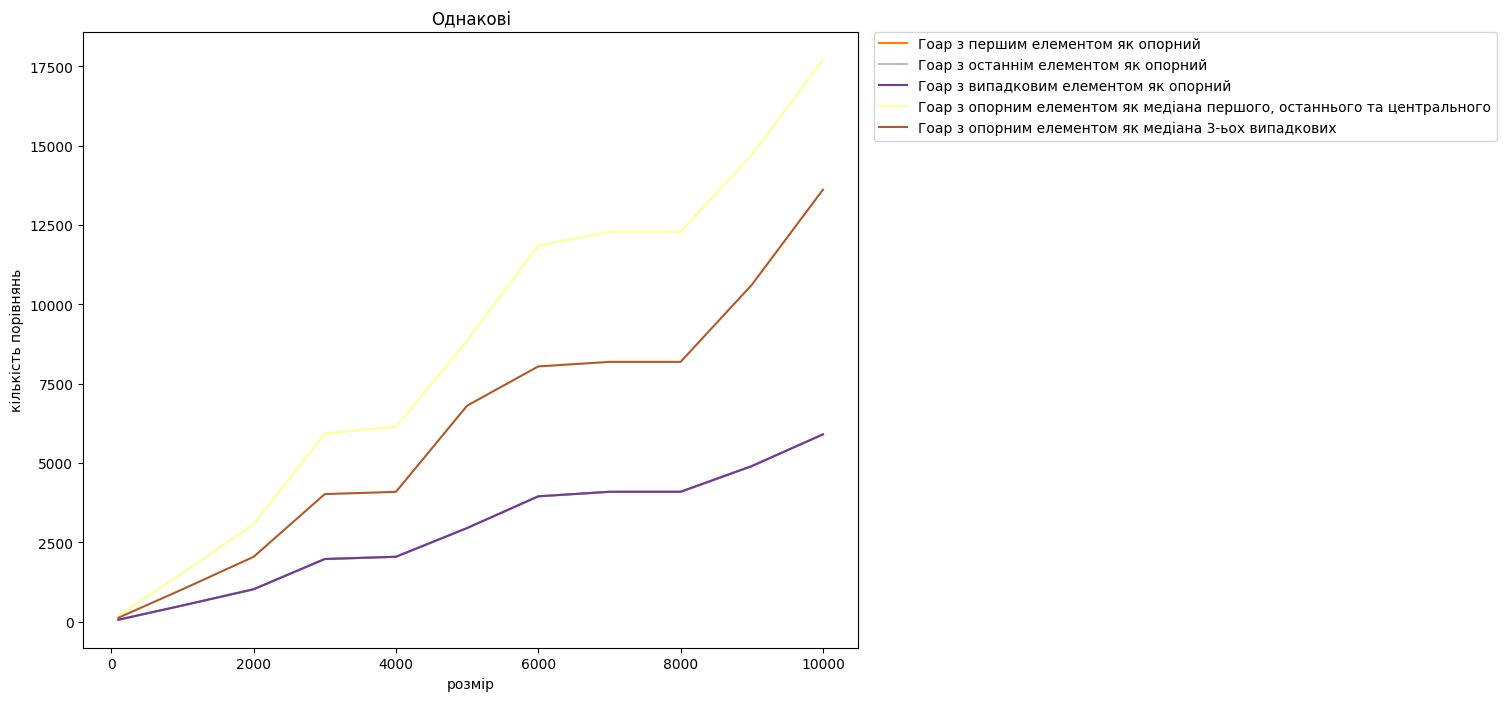

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(Y_identical)):
    if Y_identical[i] not in Y_identical[: 7]:
        ax.plot(X, Y_identical[i]["comparisons"], color=plt.colormaps["Paired"].colors[i], label=names[i])

        ax.set_xlabel("розмір")
        ax.set_ylabel("кількість порівнянь")
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title("Однакові")

Memory

Text(0.5, 1.0, 'Однакові')

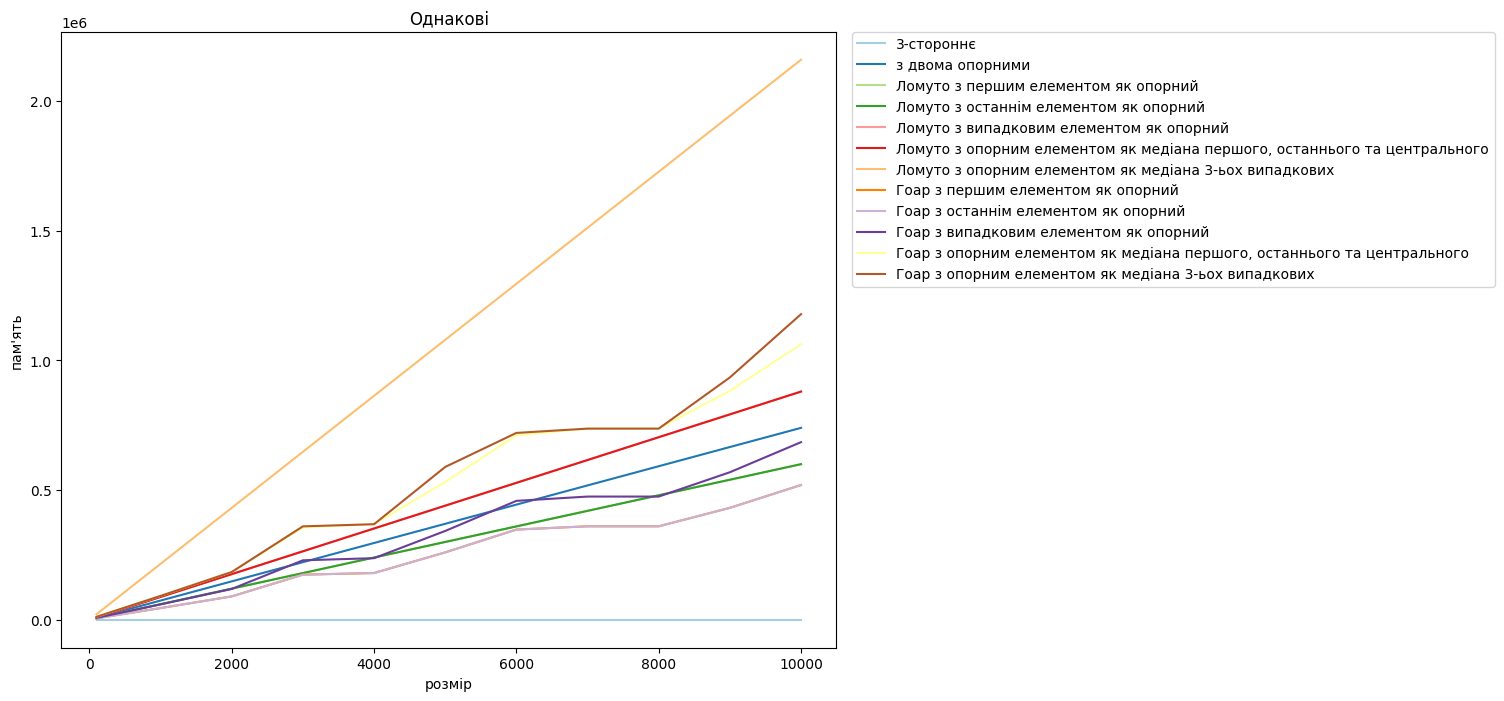

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for i in range(len(Y_identical)):
    ax.plot(X, Y_identical[i]["memory"], color=plt.colormaps["Paired"].colors[i], label=names[i])

    ax.set_xlabel("розмір")
    ax.set_ylabel("пам'ять")
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_title("Однакові")

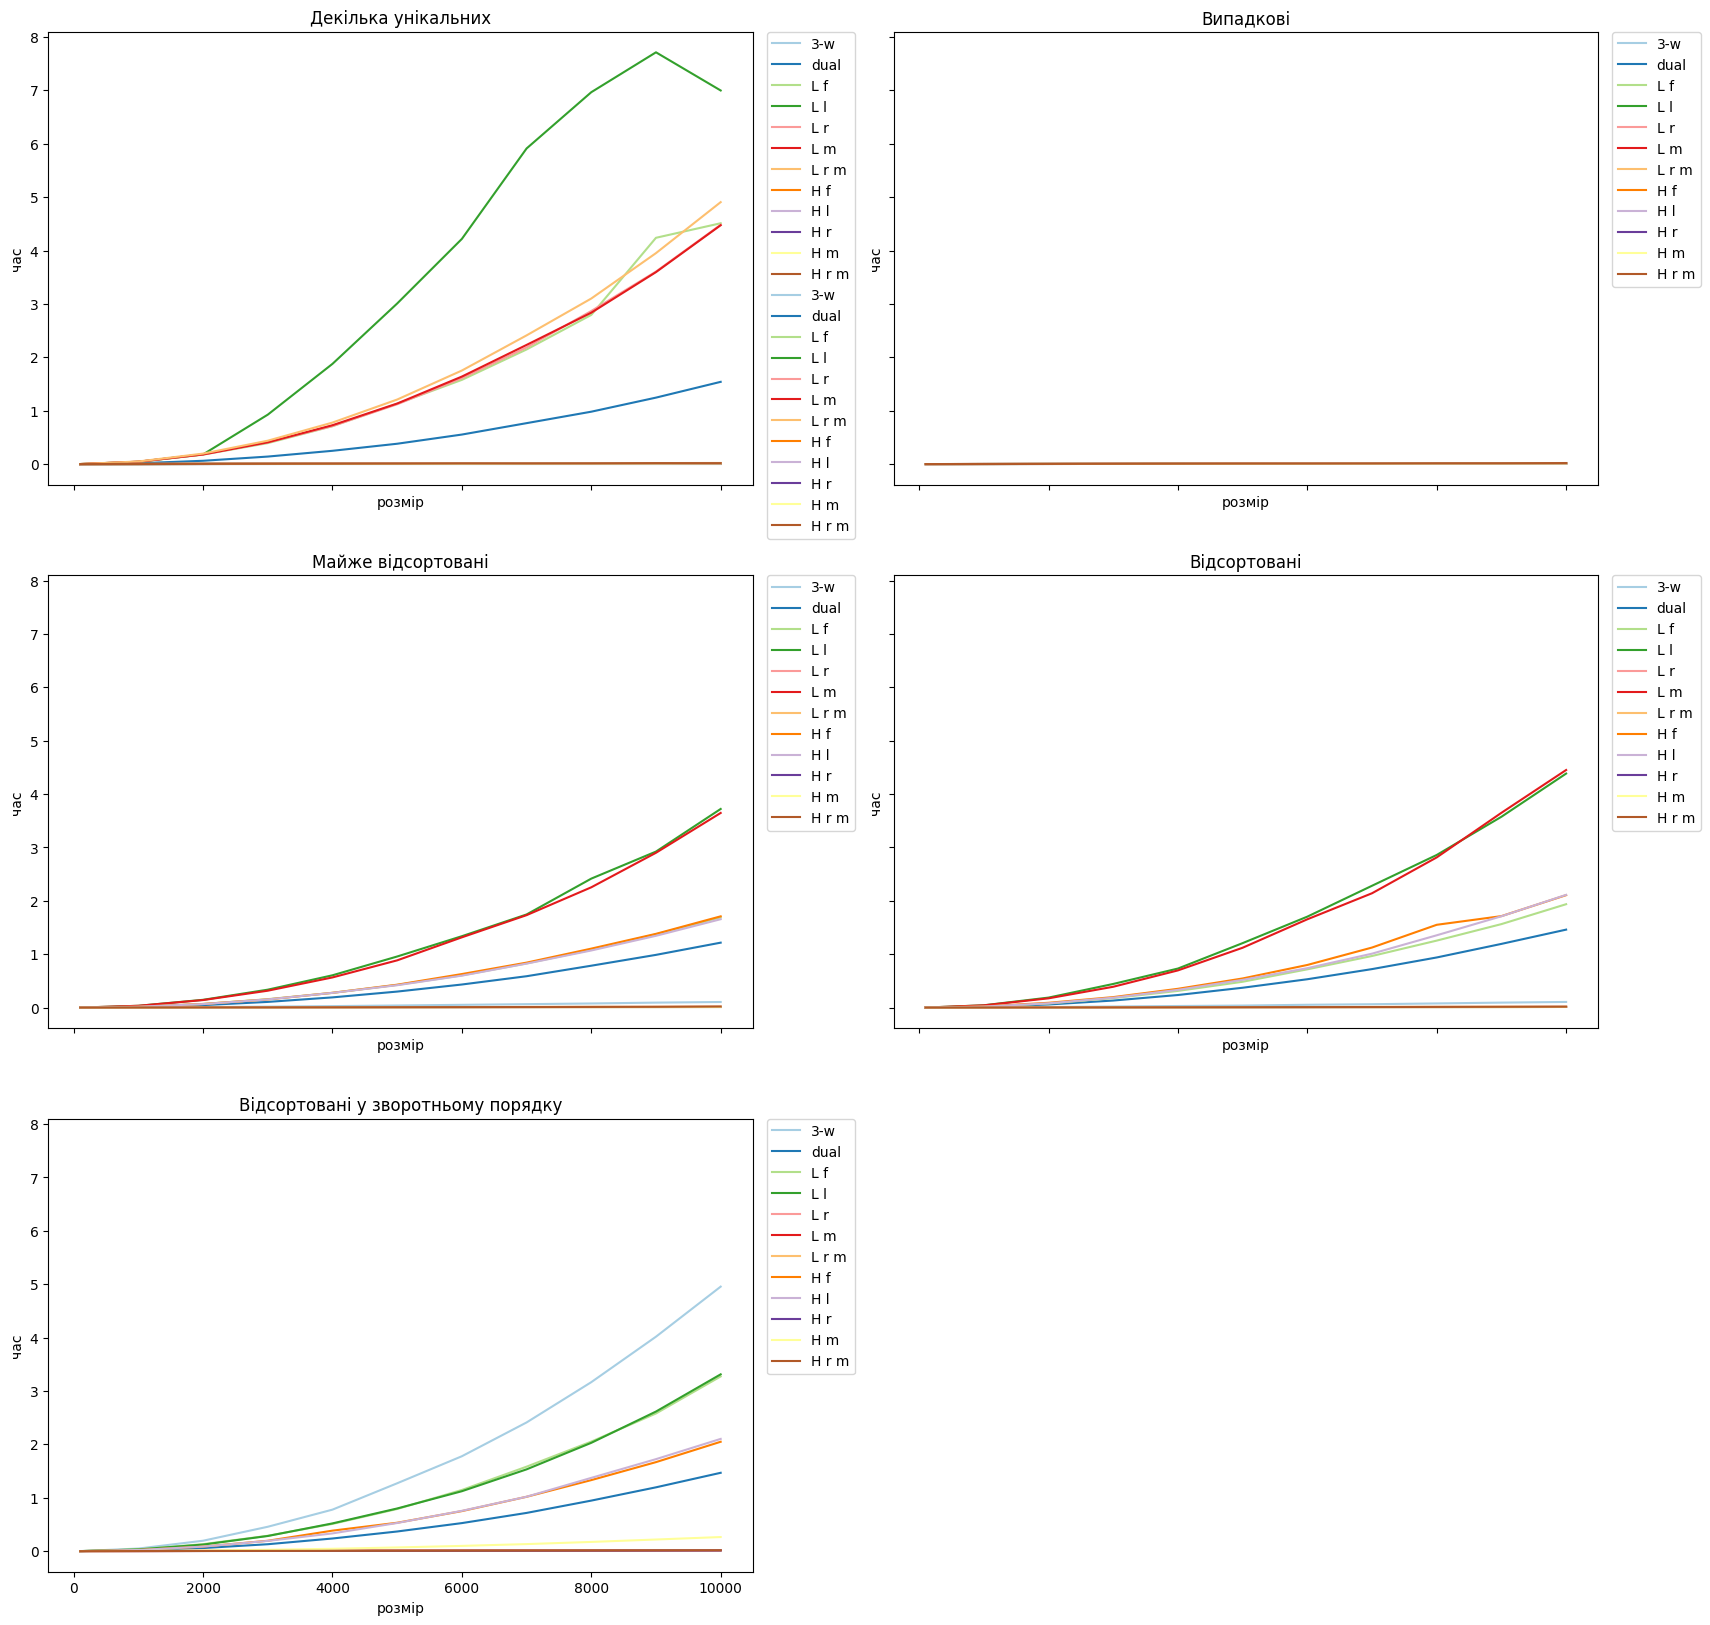

In [70]:
names_ = ["3-w", "dual", "L f", 
         "L l", "L r", 
         "L m", 
         "L r m", 
         "H f", 
         "H l", 
         "H r", 
         "H m", 
         "H r m"]

fig, ax = plt.subplots(3, 2, figsize=(20, 20), sharex=True, sharey=True)
ax[-1][-1].set_visible(False)
Y = [Y_identical, Y_sorted, Y_reverse_sorted, Y_random, Y_almost_sorted, Y_triangular, Y_few_unique]
Title_time_names = ["Однакові", "Відсортовані", "Відсортовані у зворотньому порядку", "Випадкові", "Майже відсортовані", "Трикутні", "Декілька унікальних"]
for i in range(len(Y)):
    for j in range(len(Y[i])):
        ax[i%3][i%2].plot(X, Y[i][j]["time"], color=plt.colormaps["Paired"].colors[j], label=names_[j])

        ax[i%3][i%2].set_xlabel("розмір")
        ax[i%3][i%2].set_ylabel("час")
        ax[i%3][i%2].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax[i%3][i%2].set_title(Title_time_names[i])
    

In [69]:
Y_random

(3, 2)

Text(0.5, 1.0, 'Випадкові')

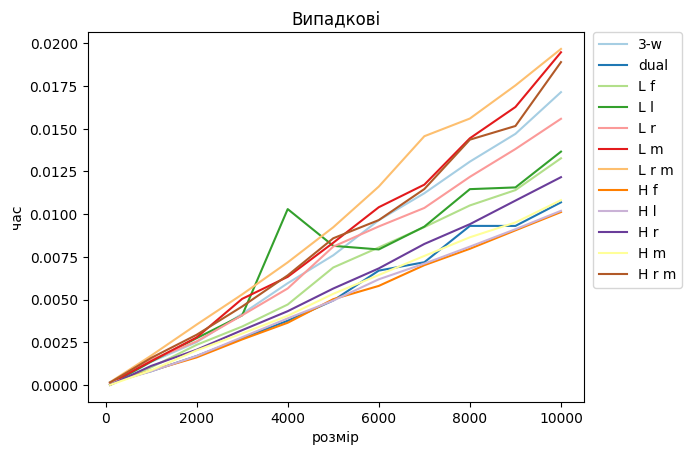

In [72]:
fig, axs = plt.subplots(1, 1)
for j in range(len(Y_random)):
        axs.plot(X, Y_random[j]["time"], color=plt.colormaps["Paired"].colors[j], label=names_[j])

        axs.set_xlabel("розмір")
        axs.set_ylabel("час")
        axs.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
axs.set_title("Випадкові")